In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

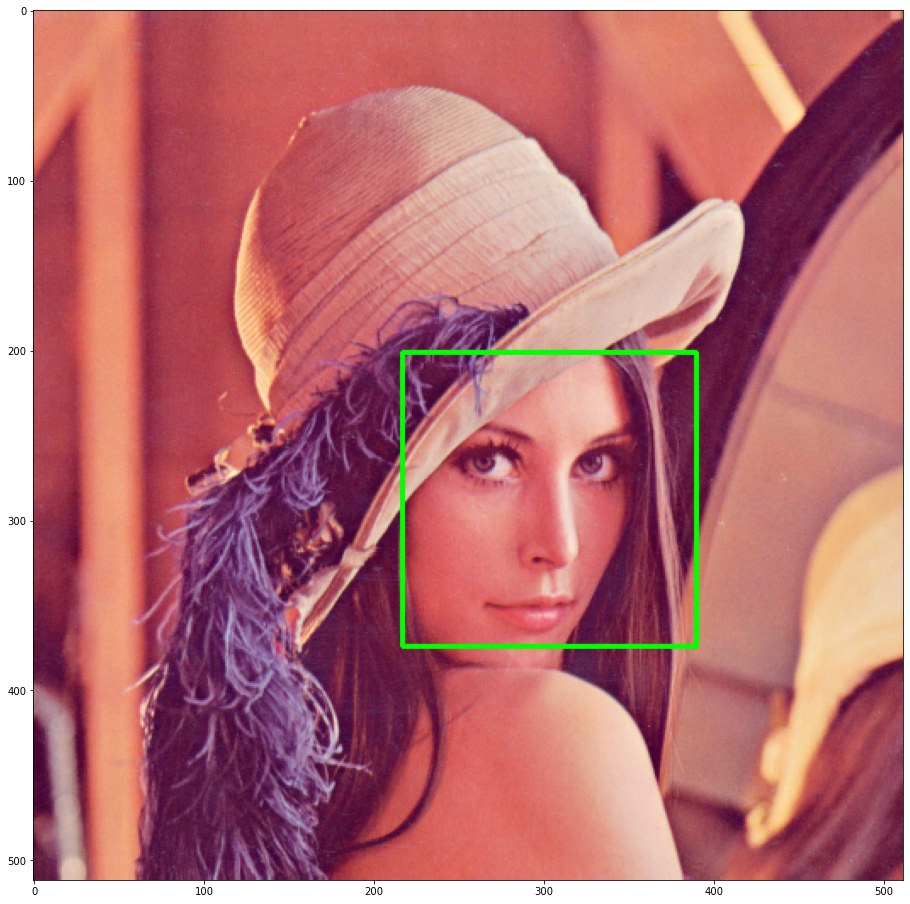

In [9]:
#-- Create the haar cascade --#
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Read an image
img = cv2.imread('lena.png')

# Detect faces in the image

faces = faceCascade.detectMultiScale(img,scaleFactor=1.1,minNeighbors=5,minSize=(100,100))
# Draw a rectangle around the faces


for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(16,16));
plt.imshow(img[:,:,::-1]);

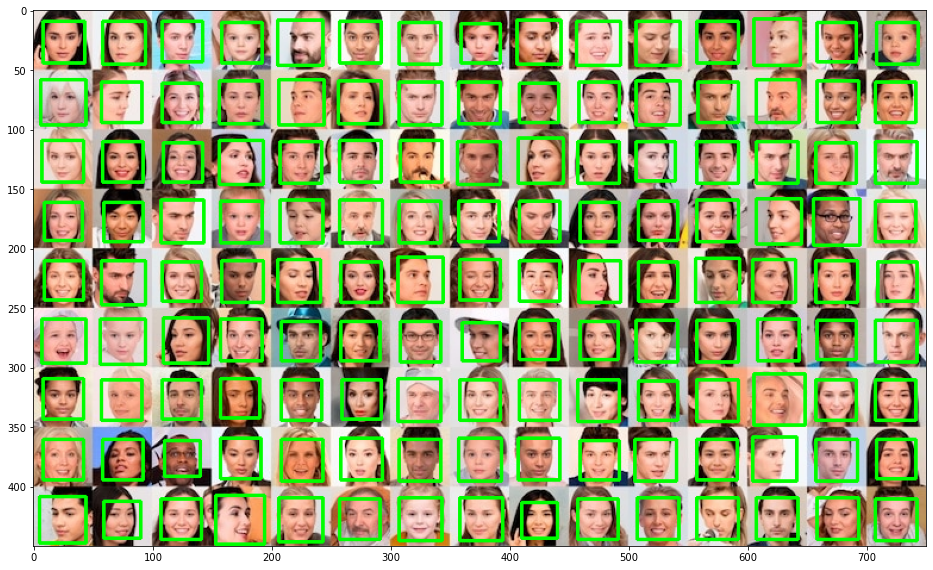

In [4]:
faceCascade= cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

img = cv2.imread('faces.jpeg')

faces = faceCascade.detectMultiScale(img,scaleFactor=1.013,minNeighbors=5,minSize=(20,20),maxSize=(45,45))
 
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

plt.figure(figsize=(16,16));
plt.imshow(img[:,:,::-1]);


## Face Detection using Video

In [2]:
# To capture video from webcam. 
cap = cv2.VideoCapture(0)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

while(cap.isOpened()):
     # Read the frame
    ret, frame = cap.read()
    if(ret):
        gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
            # Detect the faces
        faces = faceCascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5,minSize=(70,70))
        for face in faces:
            x,y,w,h = face
            cv2.rectangle(frame, (x,y), (x+w,y+h),(0,0,255),2)
            face_roi = gray[y:y+h,x:x+w]
            eyes = eyeCascade.detectMultiScale(face_roi,scaleFactor=1.2,minNeighbors=5)
            for eye in eyes:
                x2,y2,w2,h2 = eye
                cv2.rectangle(frame,(x+x2,y+y2),(x+x2+w2,y+y2+h2),(255,0,0),1)
    else:
        break
    cv2.imshow('Frame',frame)
    
    # Stop if escape key is pressed
    if cv2.waitKey(1) == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()